In [1]:
%matplotlib inline

import numpy as np
import cProfile
import random
from SNN import *
from NN import *
from WAVreader import *
from copy import deepcopy
from random import shuffle
from scipy.io import wavfile
from scipy.fftpack import fft, dct
from pylab import *
from numpy import dot, outer
from sklearn.decomposition import PCA

In [54]:
c = 3
filelist = ['6-1.wav',
            '3-1.wav'
            ]
info = WAVreader(filelist, [-1,1], 0.05)
data = info.concatset

14.6035
Scaled 963 windows down to 821
Finished file 6-1.wav
14.5955
Scaled 1285 windows down to 1004
Finished file 3-1.wav

Final data set consists of 1817 windows over 2 classes


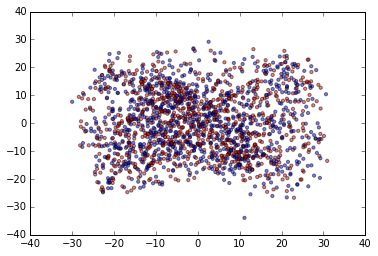

In [48]:
X = [dat[0] for dat in info.lnDeltaset]
labels = [(dat[1]+0.0)/info.length*2 for dat in info.concatset]
pca = PCA(n_components=2)
pca.fit(X)
newX = pca.transform(X)
scatter([x[0] for x in newX], [x[1] for x in newX],c=[[1,0,0],[0,0,1]],alpha=0.5,s=10)

In [4]:
trainset = []
testset = []
for i in xrange(len(data)):
    if i%10 == 0: testset.append(data[i])
    else: trainset.append(data[i])
print (len(data), len(testset))

(1817, 182)


In [52]:
NTN = ShallowNeuralNetwork()#input_dim=26, hidden_dim=13)
# cProfile.run('NTN.train(trainset, maxiter=41, alpha=0.0001, lmbda=0.001, display_progress=True)')
NTN.train(trainset, maxiter=51, alpha=0.0001, display_progress=True)

completed iteration 0; error is 413.56690061; size is 1.67603061353
completed iteration 10; error is 125.329002403; size is 26.5679678352
completed iteration 20; error is 56.8502736638; size is 40.5413838418
completed iteration 30; error is 26.8847281436; size is 48.7112964327
completed iteration 40; error is 15.3029747165; size is 53.5786665723
completed iteration 50; error is 9.97602703499; size is 56.6823154833


In [50]:
i=101
print data[i][1]
NTN.forward_propagation(data[i][0])
print NTN.hidden
print NTN.output
print NTN.predict(data[i][0])[0]/abs(NTN.predict(data[i][0])[0])==data[i][1]

-1
[-0.9998268   0.40529565  0.9999984  -0.99288069 -0.99999956 -0.99999997
  0.98437252 -0.83229    -0.88807164 -0.88776705 -0.73433555 -0.93144404
  0.78298314  0.99999116  0.99940611 -0.99999955  0.8146673   0.77049032
  0.05616597 -0.96782849  0.99999999  0.90044868  0.86985221  0.91141673
  0.99984094  0.94691075  0.94523917  1.        ]
[ 0.14383607]
False


In [53]:
print NTN.accuracy(trainset), NTN.accuracy(testset)

0.550458715596 0.516483516484


In [5]:
# 2-class, alpha=.0001, lmbda=0, t=61
print NTN.accuracy(trainset), NTN.accuracy(testset)

0.892276422764 0.636363636364


In [5]:
# 2-class, alpha=.0001, lmbda=0, t=61
# print NTN.accuracy(trainset), NTN.accuracy(testset)

0.99433106576 0.801020408163


In [7]:
SNN = SoftmaxNeuralNetwork(output_dim=info.numClasses)
# print data[0][1]
# SNN.forward_propagation(data[0][0])
# print SNN.predictions
# SNN.backward_propagation(data[0][1])
# cProfile.run('SNN.train(trainset, maxiter=101, alpha=0.001, lmbda=.00001, display_progress=True)')
SNN.train(trainset, maxiter=101, alpha=0.001, lmbda=.0001, display_progress=True)

completed iteration 0; error is 817.0; size is 6.09546730678
completed iteration 10; error is 544.0; size is 48.7697063733
completed iteration 20; error is 333.0; size is 64.7448408766
completed iteration 30; error is 282.0; size is 72.6827483931
completed iteration 40; error is 222.0; size is 76.6640007848
completed iteration 50; error is 227.0; size is 78.1063837971
completed iteration 60; error is 219.0; size is 76.9127480917
completed iteration 70; error is 178.0; size is 77.0879338636
completed iteration 80; error is 189.0; size is 79.1653608255
completed iteration 90; error is 187.0; size is 78.9149373582
completed iteration 100; error is 200.0; size is 79.6039136254


In [8]:
# 2-class, alpha=.001, lmbda=.0001, t=101
print SNN.accuracy(trainset), SNN.accuracy(testset)

0.897859327217 0.697802197802


In [14]:
# 3-class, alpha=.0002, lmbda=.0001, t=61
print SNN.accuracy(trainset), SNN.accuracy(testset)

0.77994011976 0.563758389262


In [27]:
# 5-class, alpha=.002, lmbda=.0001, t=401
print SNN.accuracy(trainset), SNN.accuracy(testset)

0.258494031221 0.230452674897


In [ ]:
#SIMPLE TIMER
cProfile.run("rate, x = wavfile.read('5-1.wav');")
print rate, len(x)

         34665 function calls (34281 primitive calls) in 0.040 seconds

   Random listing order was used

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 transforms.py:999(_get_minposy)
       10    0.000    0.000    0.000    0.000 cbook.py:363(__init__)
        1    0.000    0.000    0.000    0.000 figure.py:99(bubble)
      197    0.000    0.000    0.000    0.000 {method 'itervalues' of 'dict' objects}
       20    0.000    0.000    0.000    0.000 artist.py:261(get_transform)
       16    0.000    0.000    0.000    0.000 ticker.py:390(__init__)
        2    0.000    0.000    0.000    0.000 fromnumeric.py:53(take)
    81/78    0.000    0.000    0.000    0.000 {hash}
       10    0.000    0.000    0.000    0.000 cbook.py:495(connect)
       95    0.000    0.000    0.000    0.000 text.py:1020(set_text)
        2    0.000    0.000    0.000    0.000 lines.py:542(set_axes)
      3/2    0.000    0.000    0.000    0.000 tr

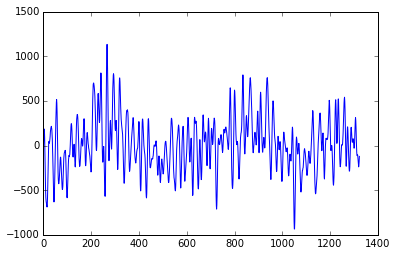

In [28]:
#MORE COMPLEX TIMER - BUT POSSIBLY CAN EXTRACT INFO INTO VARIABLES
import cProfile, pstats, StringIO
pr = cProfile.Profile()
pr.enable()
pr.run("rate, x = wavfile.read('5-1.wav');")
pr.disable()
s = StringIO.StringIO()
ps = pstats.Stats(pr, stream=s).strip_dirs()
ps.print_stats()
print s.getvalue()